In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:

import tensorflow as tf

In [3]:

mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


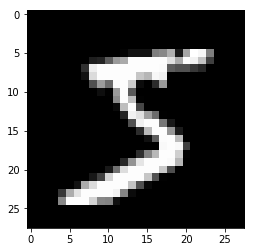

In [4]:

plt.imshow(x_train[0],cmap='gray')

In [5]:

x_train.shape

(60000, 28, 28)

In [0]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [0]:
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [8]:
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [9]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Using TensorFlow backend.


In [0]:
#creating a single layer 

In [0]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [14]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 40s 674us/step - loss: 0.2146 - acc: 0.9354
Epoch 2/10
60000/60000 [==============================] - 40s 668us/step - loss: 0.0855 - acc: 0.9737
Epoch 3/10
60000/60000 [==============================] - 41s 679us/step - loss: 0.0592 - acc: 0.9814
Epoch 4/10
60000/60000 [==============================] - 41s 679us/step - loss: 0.0429 - acc: 0.9865
Epoch 5/10
60000/60000 [==============================] - 41s 678us/step - loss: 0.0347 - acc: 0.9888
Epoch 6/10
60000/60000 [==============================] - 41s 676us/step - loss: 0.0291 - acc: 0.9904
Epoch 7/10
60000/60000 [==============================] - 41s 683us/step - loss: 0.0237 - acc: 0.9921
Epoch 8/10
60000/60000 [==============================] - 41s 684us/step - loss: 0.0229 - acc: 0.9921
Epoch 9/10
60000/60000 [==============================] - 41s 679us/step - loss: 0.0197 - acc: 0.9931
Epoch 10/10
60000/60000 [==============================] - 41s 683us/step - loss: 

adding another layer and running the model

In [0]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [12]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 41s 681us/step - loss: 0.0440 - acc: 0.9856
Epoch 2/10
60000/60000 [==============================] - 40s 672us/step - loss: 0.0329 - acc: 0.9888
Epoch 3/10
60000/60000 [==============================] - 40s 675us/step - loss: 0.0277 - acc: 0.9905
Epoch 4/10
60000/60000 [==============================] - 41s 677us/step - loss: 0.0240 - acc: 0.9918
Epoch 5/10
60000/60000 [==============================] - 41s 681us/step - loss: 0.0220 - acc: 0.9928
Epoch 6/10
60000/60000 [==============================] - 41s 677us/step - loss: 0.0180 - acc: 0.9941
Epoch 7/10
60000/60000 [==============================] - 40s 675us/step - loss: 0.0163 - acc: 0.9942
Epoch 8/10
60000/60000 [==============================] - 41s 675us/step - loss: 0.0172 - acc: 0.9942
Epoch 9/10
60000/60000 [==============================] - 41s 683us/step - loss: 0.0159 - acc: 0.9945
Epoch 10/10
60000/60000 [==============================] - 41s 683us/step - loss: 

In [16]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 212us/step


[0.06184042668762595, 0.9854]

9


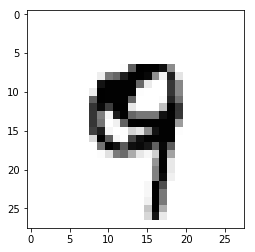

In [17]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())